## Final Project Submission

Please fill out:
* Student name: Raymond Willey
* Student pace: self paced
* Scheduled project review date/time: December 17, 2018 6:30pm EST
* Instructor name: Peter Bell
* Blog post URL: https://rwilleyii.blogspot.com/2018/12/just-because-its-accurate-doesnt-mean.html


# Module 1 Project
## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import datetime as dt
import calendar

## Importing the Data

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* **sqft_lot15** - lotSize area in 2015(implies-- some renovations)

In [2]:
housing_data = pd.read_csv('kc_house_data.csv')
housing_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Scrubbing

In [5]:
housing_data.isna().sum() # Checking for null values.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Dealing with Null Values
Items with null values are `waterfront`, `view`, and `yr_renovated`.

**waterfront:** Series of floats with value of 1 or 0, with 1 indicating house has a view to the waterfront. Given ~2,400 null values with a mean of 0.09, best approach is to replace null values with the mode of 0.

**view:** Appears to be times viewed, not simply if viewed. With only 63 null values, best to drop these rows.

**yr_renovated:** Because `sqft_living15` and `sqft_lot15` columns imply renovation, they can be combined with the `yr_renovated` column to determine if a home has been renovated at all. If square footage of the lot or living area has changed, or a *year renovated* exists, then the home has been renovated. Otherwise, it is assumed the home is not renovated. Information to be stored in a new column called `renovated`, which will be a boolean value. The `yr_renovated` column will then be dropped.

In [6]:
# Convert waterfront column to bool. All null values will automatically be assigned false.
housing_data['waterfront'] = housing_data['waterfront'].astype('bool')

# Drop null values from view column
housing_data = housing_data[pd.notnull(housing_data['view'])]

# Determine if home renovated, create renovated column, drop yr_renovated
delta_living = housing_data['sqft_living'] - housing_data['sqft_living15']
delta_lot = housing_data['sqft_lot'] - housing_data['sqft_lot15']
renovated_conditions = (delta_living != 0)|(delta_lot != 0)|(housing_data['yr_renovated'] > 0)

housing_data['renovated'] = np.where(renovated_conditions, True, False) 
housing_data.drop(columns=['yr_renovated'], inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null bool
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
renovated        21534 non-null bool
dtypes: bool(2), float64(6), int64(11), object(2)
memory usage: 3.3+ MB


### Placeholder Values
Based on the min and max values of the columns of integer and float columns, no placeholder values appear to be present. However, the `sqft_basement` column is the incorrect data type (string), suggesting it contains placeholder values. 

**sqft_basement:** Expect basement square footage to be equal to the difference between the square footage of the living area and the square footage above the basement. If so, then placeholder values can be replaced with this calculation.

In [7]:
# Check for placeholder value
pd.value_counts(housing_data['sqft_basement']).head(2)  # Placeholder value identified as question mark

0.0    12798
?        452
Name: sqft_basement, dtype: int64

In [8]:
# Replace placeholders with difference of sqft_living and sqft_above, then convert column to float
housing_data['delta_living_above'] = housing_data['sqft_living'] - housing_data['sqft_above']
housing_data['sqft_basement'].replace(to_replace = '?', value = housing_data['delta_living_above'], inplace=True)
housing_data['sqft_basement'] = housing_data['sqft_basement'].astype('float64')

In [9]:
# Check for inconsistencies
housing_data['bsmt_disc'] = housing_data['delta_living_above'] - housing_data['sqft_basement']
pd.value_counts(housing_data['bsmt_disc'])

0.0    21534
Name: bsmt_disc, dtype: int64

There are no inconsistencies with the assumption that the difference between the total living area and the living area above the basement is equal to the square footage of the basement. The only thing left is to drop the columns used for this check (`delta_living_above` and `bsmt_disc`).

In [10]:
housing_data = housing_data.drop(columns = ['delta_living_above', 'bsmt_disc'])
housing_data.info(), housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null bool
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
renovated        21534 non-null bool
dtypes: bool(2), float64(7), int64(11), object(1)
memory usage: 4.0+ MB


(None,
                  id         price      bedrooms     bathrooms   sqft_living  \
 count  2.153400e+04  2.153400e+04  21534.000000  21534.000000  21534.000000   
 mean   4.582351e+09  5.400577e+05      3.373038      2.115712   2079.827854   
 std    2.876779e+09  3.660596e+05      0.926410      0.768602    917.446520   
 min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
 25%    2.123212e+09  3.220000e+05      3.000000      1.750000   1430.000000   
 50%    3.904945e+09  4.500000e+05      3.000000      2.250000   1910.000000   
 75%    7.312175e+09  6.450000e+05      4.000000      2.500000   2550.000000   
 max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   
 
            sqft_lot        floors          view     condition         grade  \
 count  2.153400e+04  21534.000000  21534.000000  21534.000000  21534.000000   
 mean   1.509060e+04      1.494126      0.233863      3.409724      7.657425   
 std    4.138021e+04      0.539

### Dealing with Incorrect Data Types
After checking for placeholder values, the following columns will be converted to strings.

**id:** Convert to string.

**zipcode:** Convert to strings and check for placeholder values. One-hot-encode at end of scrubbing process.

In [11]:
pd.value_counts(housing_data['zipcode'], ascending=True) # No placeholders appear to be present

98039     50
98148     57
98024     79
98010    100
98102    104
98109    109
98070    117
98014    124
98032    124
98188    136
98007    141
98005    168
98119    184
98108    186
98019    190
98011    194
98077    198
98002    199
98045    220
98105    229
98022    232
98166    253
98177    254
98030    256
98136    260
98178    262
98107    266
98112    268
98168    268
98055    268
        ... 
98199    316
98004    316
98029    321
98116    328
98106    335
98144    341
98092    349
98126    353
98001    359
98075    359
98053    402
98056    403
98125    407
98027    409
98033    432
98074    440
98155    445
98058    454
98059    468
98133    492
98023    495
98006    497
98118    505
98042    545
98034    545
98117    553
98052    573
98115    580
98038    586
98103    601
Name: zipcode, Length: 70, dtype: int64

In [12]:
pd.value_counts(housing_data['id'], ascending=True) # No placeholders appear to be present, though there do appear to be some duplicate values

1777500160    1
9492500170    1
8165500110    1
880000205     1
3021059276    1
4364700875    1
7812801125    1
3420069065    1
9238480020    1
3333002440    1
1922000070    1
2607740100    1
1931300035    1
3324069058    1
2768100545    1
2617300160    1
6815100095    1
7893808220    1
2738640470    1
1235100328    1
5470100090    1
2424059116    1
4443800810    1
2770603522    1
4038300010    1
475000510     1
5608010980    1
7515000035    1
3992700130    1
7519001825    1
             ..
2019200220    2
9407110710    2
6623400187    2
5132000140    2
7972000010    2
1446403850    2
9211500620    2
5054800110    2
2231500030    2
3303000130    2
2023049218    2
3739500096    2
7524400250    2
8129700644    2
5101402435    2
7520000520    2
1036400200    2
1721801010    2
1232000810    2
722039087     2
7387500235    2
2724049222    2
6117501820    2
3578401060    2
3332000615    2
5101405604    2
3395040550    2
5083000375    2
5430300171    2
795000620     3
Name: id, Length: 21357,

In [13]:
housing_data['id'] = housing_data['id'].astype('str')
housing_data['zipcode'] = housing_data['zipcode'].astype('str')

I would like to know if any market trends or seasonal cycles impact the sale price of the house, so `date` will be converted to an ordinal date/time format, which can be used to determine if prices increase or decrease with time.

An additional column, `month`, will be created to get the month sold. This will help identify if time of year makes a difference as well.

In [14]:
# Convert date to date/time format
housing_data['date'] = pd.to_datetime(housing_data['date'])

# Assign month of sales to column month
housing_data['month'] = housing_data['date'].dt.month
housing_data['month'] = housing_data['month'].apply(lambda x: calendar.month_abbr[x])

# Convert date to ordinal date
housing_data['ordinal_date'] = housing_data['date'].map(dt.datetime.toordinal)

In [15]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 23 columns):
id               21534 non-null object
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null bool
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
zipcode          21534 non-null object
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
renovated        21534 non-null bool
month            21534 non-null object
ordinal_date     21534 non-null

In [16]:
housing_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,ordinal_date
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.233863,3.409724,7.657425,1788.557537,291.270317,1971.002275,47.560180,-122.213948,1986.299944,12751.079502,735535.078713
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.765686,0.650654,1.172643,827.745641,442.199825,29.376044,0.138528,0.140735,685.121001,27255.483308,113.065260
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000,735355.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471200,-122.328000,1490.000000,5100.000000,735436.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571900,-122.230000,1840.000000,7620.000000,735522.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678100,-122.125000,2360.000000,10083.000000,735646.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,735745.000000


### Checking for Multicollinearity

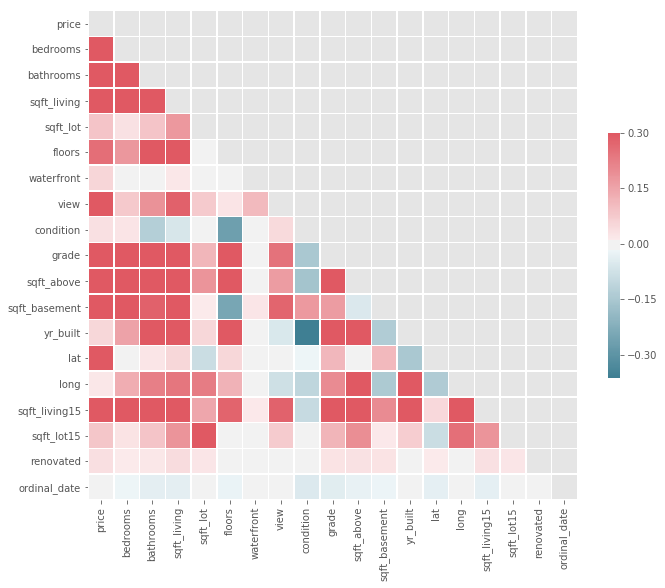

In [17]:
plt.style.use('ggplot')

def coll_check(data):
    # Create a covariance matrix
    corr = data.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize = (11,9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    plt.savefig('cov_matrix_' + str(len(data.columns)) + '_inputs.png', dpi=100)

coll_check(housing_data)

High correllation exists between `bedrooms`, `bathrooms`, `sqft_living`, `sqft_living15`, `sqft_basement`, `floors`, and `sqft_above`. This makes sense as most of these items are driven by the total living area. Because current total living area is the primary driver, all of these columns, with the exception of `sqft_living15`, will be dropped.

`yr_built` has high with `long` and `sqft_living15`, and a high negative correlation with `condition`. This suggests that, over time, home new constructions has moved east, and homes have gotten bigger. The relevance of this seems limited as `yr_built` has low correlation with price, so it will be dropped.

`long` will also be dropped as it appears to have moderate to strong correlations with a number other variables, except price. This suggests that the east-west proximity of the home is not a strong predictor of price, but is a reflection of inland expansion from the coast. While proximity to the coastline may be a benefit, it is likely offset by the benefits associated with newer buildings.

`sqft_lot` to be dropped as 2015 lot size is more relevant.

`id` will be dropped as it does not serve as a predictor.

`date` will be dropped as it is supplemented by `ordinal_date` and `month`.

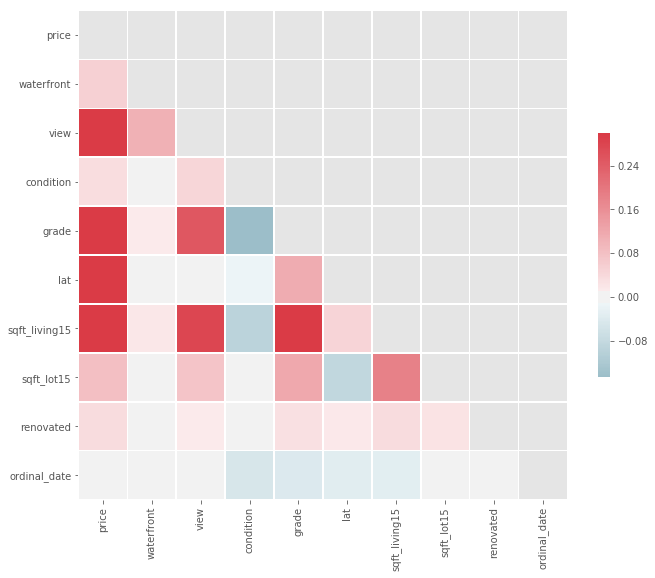

In [18]:
coll_check(housing_data.drop(columns=['sqft_living', 'sqft_lot', 'bathrooms', 'sqft_above', 'sqft_basement', 'floors', 'bedrooms', 'yr_built', 'long']))

**Grade:** Strong correlations exist between `sqft_living15` and a number of other items, including the `grade`. While the `grade` may be a better predictor with less multi-collinearity amongst other variables, it is likely to be driven in a similar manner as price, and is largely outside our control. In order to identify undervalued and overvalued homes, we would want to know the true driving factors. As a result, `grade` will be dropped instead of `sqft_living15`.

**View:** In addition, the number of `view`s is likely to be driven by more preferred features, not the inverse. So it will be dropped as well. 

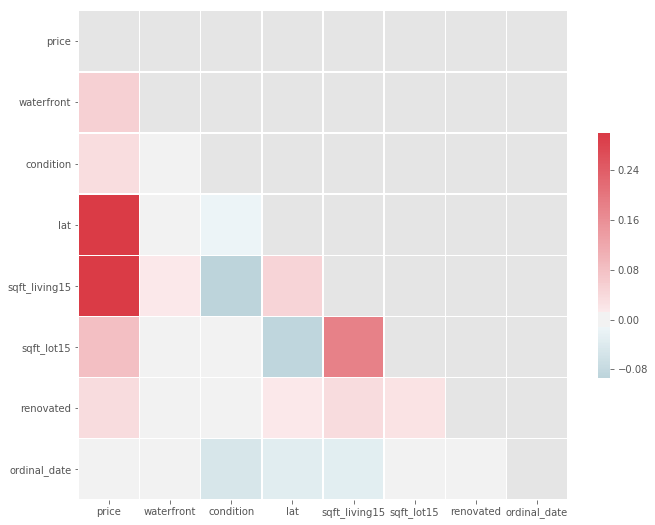

In [19]:
coll_check(housing_data.drop(columns=['grade', 'view', 'long', 'sqft_living', 'sqft_lot', 'bathrooms', 'sqft_above', 'sqft_basement', 'floors', 'bedrooms', 'yr_built']))

In [20]:
# Drop necessary columns and save to new dataframe
to_drop = ['id', 'date', 'grade', 'view', 'long', 'yr_built',
           'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
           'bathrooms', 'floors', 'bedrooms']
housing_data_cleaned = housing_data.drop(columns=to_drop)
housing_data_cleaned.head()

,price,waterfront,condition,zipcode,lat,sqft_living15,sqft_lot15,renovated,month,ordinal_date
0,221900.0,True,3,98178,47.5112,1340,5650,True,Oct,735519
1,538000.0,False,3,98125,47.7210,1690,7639,True,Dec,735576
2,180000.0,False,3,98028,47.7379,2720,8062,True,Feb,735654
3,604000.0,False,5,98136,47.5208,1360,5000,True,Dec,735576
4,510000.0,False,3,98074,47.6168,1800,7503,True,Feb,735647


# Exploring Data

In [21]:
# Convert waterfront and renovated to categorical variables, and get dummies from zipcode and month
housing_data_cleaned['waterfront'] = housing_data_cleaned.waterfront.astype('int')
housing_data_cleaned['renovated'] = housing_data_cleaned.renovated.astype('int')

housing_data_cleaned = pd.get_dummies(housing_data_cleaned)
housing_data_cleaned.head()

,price,waterfront,condition,lat,sqft_living15,sqft_lot15,renovated,ordinal_date,zipcode_98001,zipcode_98002,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,221900.0,1,3,47.5112,1340,5650,1,735519,0,0,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,0,3,47.7210,1690,7639,1,735576,0,0,...,1,0,0,0,0,0,0,0,0,0
2,180000.0,0,3,47.7379,2720,8062,1,735654,0,0,...,0,1,0,0,0,0,0,0,0,0
3,604000.0,0,5,47.5208,1360,5000,1,735576,0,0,...,1,0,0,0,0,0,0,0,0,0
4,510000.0,0,3,47.6168,1800,7503,1,735647,0,0,...,0,1,0,0,0,0,0,0,0,0


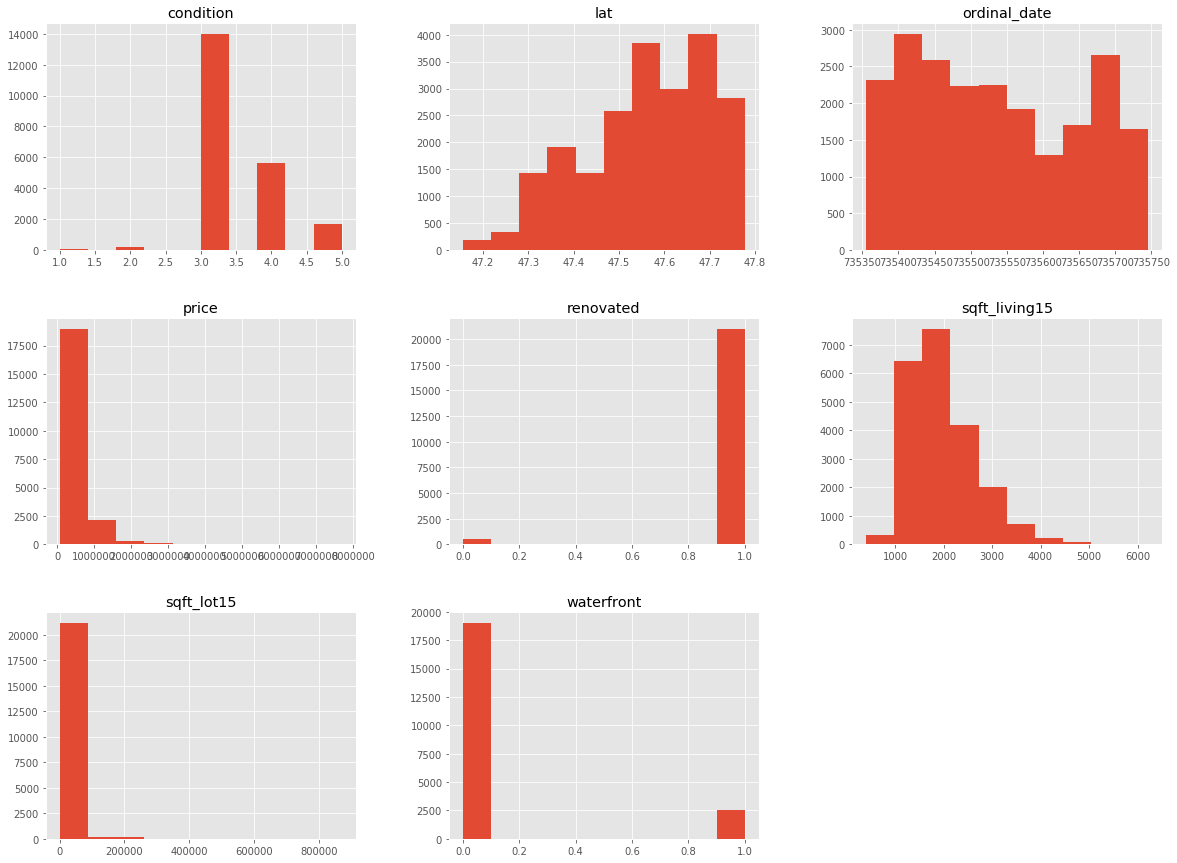

In [22]:
housing_data_cleaned.iloc[:, 0:8].hist(figsize = (20, 15))
plt.savefig('hist_orig_housing_data.png', dpi=100)

## Z-Score Standardization and Log Normalization

In [23]:
numerical_columns = ['condition', 'lat', 'ordinal_date', 'sqft_living15', 'sqft_lot15', 'price']

for column in numerical_columns:
    housing_data_cleaned[column] = np.log(housing_data_cleaned[column])
    housing_data_cleaned[column] = (housing_data_cleaned[column] - housing_data_cleaned[column].mean())/housing_data_cleaned[column].std()
    
housing_data_cleaned.head()

,price,waterfront,condition,lat,sqft_living15,sqft_lot15,renovated,ordinal_date,zipcode_98001,zipcode_98002,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,-1.402334,1,-0.613015,-0.352045,-1.034979,-0.395196,1,-0.142134,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.280395,0,-0.613015,1.159591,-0.326307,-0.024014,1,0.361998,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-1.799954,0,-0.613015,1.281068,1.127029,0.042313,1,1.051800,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.500259,0,2.204300,-0.282730,-0.989736,-0.545604,1,0.361998,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.178843,0,-0.613015,0.409649,-0.133737,-0.046121,1,0.989897,0,0,...,0,1,0,0,0,0,0,0,0,0


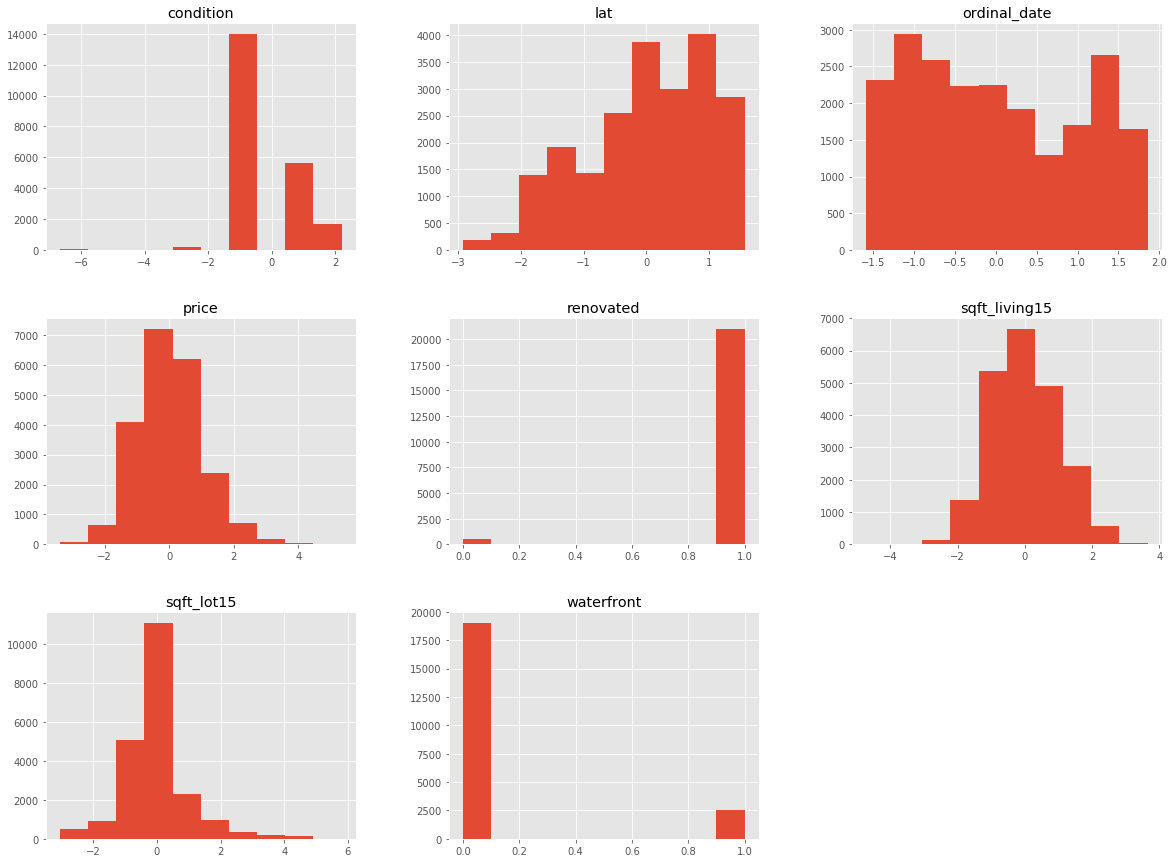

In [24]:
housing_data_cleaned.iloc[:, 0:8].hist(figsize = (20, 15))
plt.savefig('hist_lognorm_housing_data.png', dpi=100)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


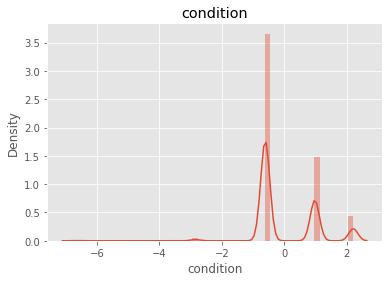

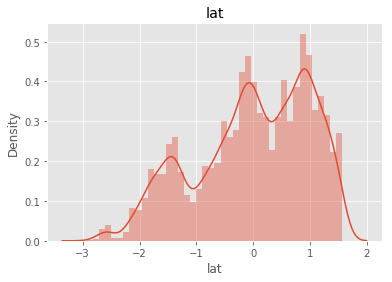

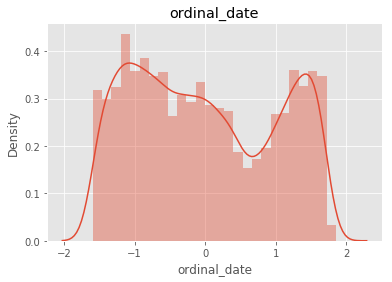

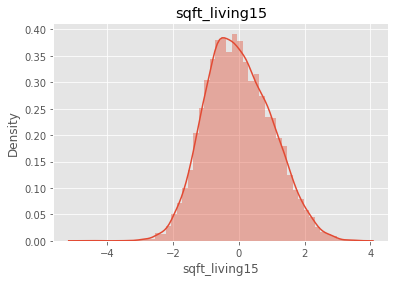

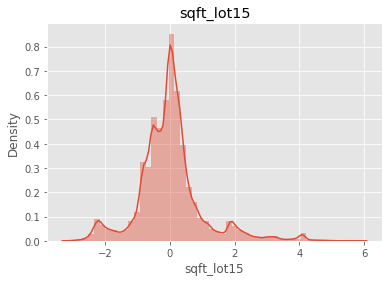

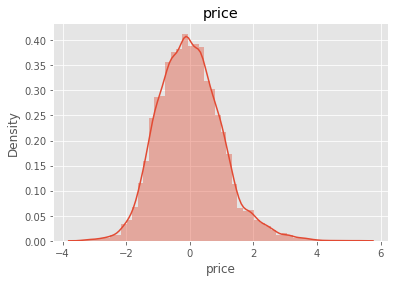

In [25]:
for column in numerical_columns:
    sns.distplot(housing_data_cleaned[column])
    plt.title(column)
    plt.ylabel('Density')
    plt.savefig('distplot_' + column + '.png', dpi=100)
    plt.show()

# Building the Model

### Numerical Predictors
First step is to get coefficients, p-values, and r-squared for each of the numerical data predictors. Scatterplots with prediction lines also created to visualize the relationships.

,Variable,R Squared,Intercept,Slope,P Value
0,condition,0.001825,-2.157129e-14,0.042718,3.582996e-10
1,lat,0.201983,2.053449e-12,0.449426,0.000000e+00
2,ordinal_date,0.000022,-7.736737e-12,-0.004699,4.904649e-01
3,sqft_living15,0.368177,-2.499286e-13,0.606776,0.000000e+00
4,sqft_lot15,0.015288,1.826664e-15,0.123645,4.057612e-74


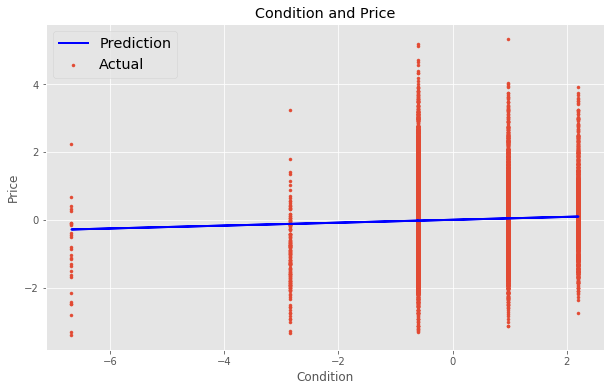

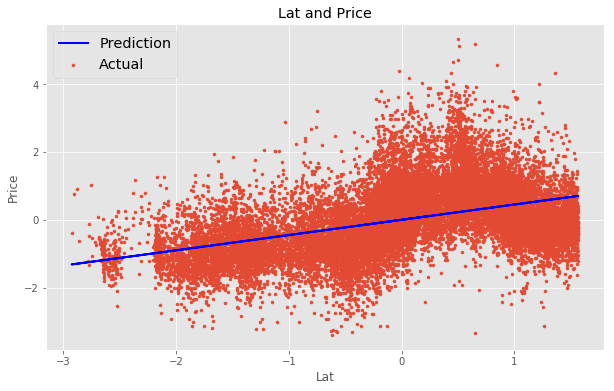

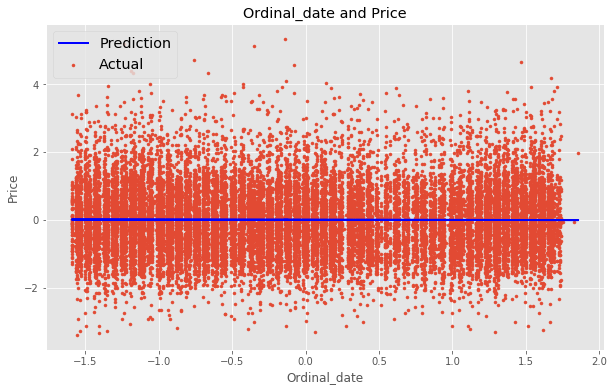

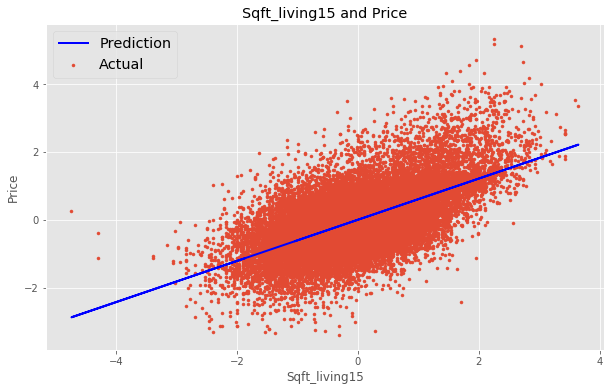

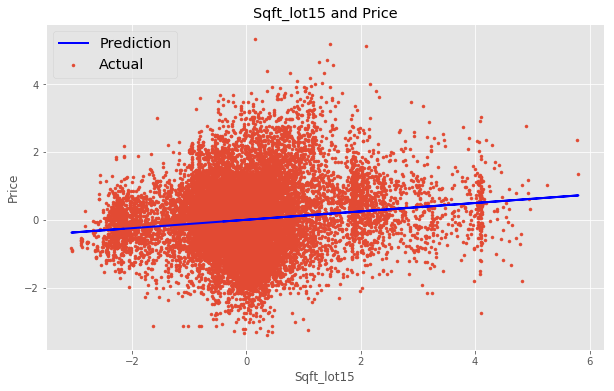

In [26]:
predictors = housing_data_cleaned.loc[:, ['condition', 'lat', 'ordinal_date', 'sqft_living15', 'sqft_lot15']].columns

results = [['Variable', 'R Squared', 'Intercept', 'Slope', 'P Value']]

for predictor in predictors:
    f = 'price~' + predictor
    model = smf.ols(formula=f, data=housing_data_cleaned).fit()
    results.append([predictor, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    y_pred = model.predict()
    plt.figure(figsize=(10, 6))
    plt.title(predictor.capitalize() + ' and Price')
    plt.xlabel(predictor.capitalize())
    plt.ylabel('Price')
    plt.scatter(housing_data_cleaned[predictor], housing_data_cleaned['price'], marker='.', label='Actual')
    plt.plot(housing_data_cleaned[predictor], y_pred, color='b', lw=2, label='Prediction')
    plt.legend(loc=2, fontsize='x-large')
    plt.savefig('scatter_' + f + '.png', dpi=100)

result_df = pd.DataFrame(results[1:],columns=results[0])
result_df

### Categorical Predictors
Models to be created for categorical predictors.

In [27]:
renovated = ['renovated']
waterfront = ['waterfront']
zips = [col for col in housing_data_cleaned.columns if 'zipcode' in col]
months = [col for col in housing_data_cleaned.columns if 'month' in col]

zips.pop(), months.pop()

columns = [renovated, waterfront, zips, months]

for column in columns:
    f = 'price~'+ "+".join(column)
    model = smf.ols(formula=f, data=housing_data_cleaned).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     36.04
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           1.96e-09
Time:                        14:52:43   Log-Likelihood:                -30537.
No. Observations:               21534   AIC:                         6.108e+04
Df Residuals:                   21532   BIC:                         6.109e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2633      0.044     -5.932      0.0

Drop columns where R-Square is less than 0.01, and rebuild model.

In [28]:
housing_data_cleaned = housing_data_cleaned.drop(columns = ['condition', 'ordinal_date', 'renovated', 'waterfront'] + months)
housing_data_cleaned.head()

,price,lat,sqft_living15,sqft_lot15,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_Sep
0,-1.402334,-0.352045,-1.034979,-0.395196,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.280395,1.159591,-0.326307,-0.024014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.799954,1.281068,1.127029,0.042313,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.500259,-0.282730,-0.989736,-0.545604,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.178843,0.409649,-0.133737,-0.046121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
columns = housing_data_cleaned.columns[1:-2]

f = 'price~'
for column in columns:
    f = f + '+' + column
model = smf.ols(formula=f, data=housing_data_cleaned).fit()
print(model.summary())
dict(model.params[0:4])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     853.2
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:52:44   Log-Likelihood:                -16005.
No. Observations:               21534   AIC:                         3.216e+04
Df Residuals:                   21461   BIC:                         3.274e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8171      0.034     24.217

{'Intercept': 0.8171427141601217,
 'lat': 0.0865317567748818,
 'sqft_living15': 0.5198232109654686,
 'sqft_lot15': 0.10874631691006578}

In [37]:
np.min(list(model.params[4:])), np.max(list(model.params[4:]))

(-1.7111702462323306, 0.9778489424914141)

# Testing the Model
The current model yields an adjusted r-squred of 0.74, indicated that 74% of the variability in price can be explained by the model. The data will now be split into test and train sets, and the mean squared error (mse) and root mean squared error (rmse) will be used to determine how effectively the model makes predictions.

In [30]:
X = housing_data_cleaned.drop(columns = ['price', 'month_Sep', 'zipcode_98198'])
y = housing_data_cleaned['price']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
    
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.8, 
                                                    random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Percentage Difference:', str(round(100 * abs(train_mse - test_mse) / train_mse, 2)) + '%')

Train Mean Squared Error: 0.2608212828126549
Test Mean Squared Error: 0.2627800703329602
Percentage Difference: 0.75%


The MSE and RMSE for the test and train sets are not significantly different, suggesting the model is a good fit.

### K-Fold Cross Validation
Iterate over 5 splits of the data and calculate the average MSE.

In [32]:
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_5_results.mean(), cv_5_results.std() * 2))

Accuracy: 0.74 (+/- 0.03)


The adjusted r-square and average MSE indicate that ~74% of the variance in price can be explained by the model.